<a href="https://colab.research.google.com/github/Kai-Infernus/pune_house_rent_prediction/blob/main/Pune_rent_predictions_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

# Importing the dataset

Data for the rental price

In [2]:
data = pd.read_csv('Pune_rent.csv')

# Data Observation

In [3]:
data.head()

,Renter_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1.0,BHK,Independent Floor,Limat,"6,750",450.0,Unfurnished,1
1,OWNER,2.0,BHK,Apartment,Limat,"18,000",916.0,Unfurnished,2
2,OWNER,3.0,BHK,Apartment,Limat,"16,500",1085.0,Semi-Furnished,3
3,OWNER,1.0,RK,Studio Apartment,Limat,"8,000",250.0,Furnished,1
4,OWNER,2.0,BHK,Apartment,Limat,"25,000",1005.0,Semi-Furnished,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Renter_type    15049 non-null  object 
 1   bedroom        15049 non-null  float64
 2   layout_type    15049 non-null  object 
 3   property_type  15049 non-null  object 
 4   locality       15049 non-null  object 
 5   price          15049 non-null  object 
 6   area           15049 non-null  float64
 7   furnish_type   15049 non-null  object 
 8   bathroom       14949 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.1+ MB


In [5]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

AGENT      13664
OWNER       1271
BUILDER      114
Name: Renter_type, dtype: int64
********************
2.0    7392
1.0    4393
3.0    2758
4.0     462
5.0      39
6.0       3
8.0       2
Name: bedroom, dtype: int64
********************
BHK    14612
RK       437
Name: layout_type, dtype: int64
********************
Apartment            13878
Studio Apartment       437
Independent House      411
Villa                  207
Independent Floor      116
Name: property_type, dtype: int64
********************
Secha     6677
Limat     5264
Sikela    3108
Name: locality, dtype: int64
********************
18,000    830
15,000    814
20,000    720
16,000    685
12,000    667
         ... 
16,001      1
19,190      1
35,001      1
15,660      1
6,750       1
Name: price, Length: 335, dtype: int64
********************
1000.0    656
1200.0    591
650.0     583
600.0     554
1100.0    471
         ... 
1716.0      1
1394.0      1
2259.0      1
1274.0      1
1772.0      1
Name: area, Length: 1011, dtype

# Cleaning the data

**Null values in Bathroom Column**

In [6]:
data.isna().sum()

Renter_type      10268
bedroom          10268
layout_type      10268
property_type    10268
locality         10268
price            10268
area             10268
furnish_type     10268
bathroom         10368
dtype: int64

**Removing the null values and converting to int**

In [7]:
values = ['1','2','3','4','5','6']
data = data[data.bathroom.isin(values) == True]
print(data['bathroom'].value_counts())

2    7766
1    4233
3    2413
4     425
5      78
6       7
Name: bathroom, dtype: int64


In [8]:
data['bathroom'] = data['bathroom'].astype(int)
data

,Renter_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1.0,BHK,Independent Floor,Limat,"6,750",450.0,Unfurnished,1
1,OWNER,2.0,BHK,Apartment,Limat,"18,000",916.0,Unfurnished,2
2,OWNER,3.0,BHK,Apartment,Limat,"16,500",1085.0,Semi-Furnished,3
3,OWNER,1.0,RK,Studio Apartment,Limat,"8,000",250.0,Furnished,1
4,OWNER,2.0,BHK,Apartment,Limat,"25,000",1005.0,Semi-Furnished,2
...,...,...,...,...,...,...,...,...,...
15044,AGENT,3.0,BHK,Apartment,Sikela,"56,000",2300.0,Furnished,3
15045,AGENT,3.0,BHK,Apartment,Sikela,"56,000",2300.0,Furnished,3
15046,AGENT,2.0,BHK,Apartment,Sikela,"22,000",1117.0,Semi-Furnished,2
15047,AGENT,2.0,BHK,Apartment,Sikela,"19,700",900.0,Unfurnished,2


**We'll convert the price column into integer.**

In [9]:
data['price'] = data['price'].astype(str).replace(',', '')
data['price'] = data['price'].apply(lambda x: x.replace(',','')).astype('float')
data['price'] = data['price'].astype(int)
data.head()

,Renter_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1.0,BHK,Independent Floor,Limat,6750,450.0,Unfurnished,1
1,OWNER,2.0,BHK,Apartment,Limat,18000,916.0,Unfurnished,2
2,OWNER,3.0,BHK,Apartment,Limat,16500,1085.0,Semi-Furnished,3
3,OWNER,1.0,RK,Studio Apartment,Limat,8000,250.0,Furnished,1
4,OWNER,2.0,BHK,Apartment,Limat,25000,1005.0,Semi-Furnished,2


In [10]:
location_count = data['locality'].value_counts()
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

Series([], Name: locality, dtype: int64)

In [11]:
data['locality'] = data['locality'].apply(lambda x: 'OTHERS' if x in location_count_less_than_10 else x)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14922 entries, 0 to 15048
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Renter_type    14922 non-null  object 
 1   bedroom        14922 non-null  float64
 2   layout_type    14922 non-null  object 
 3   property_type  14922 non-null  object 
 4   locality       14922 non-null  object 
 5   price          14922 non-null  int32  
 6   area           14922 non-null  float64
 7   furnish_type   14922 non-null  object 
 8   bathroom       14922 non-null  int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 757.8+ KB


# **Visualising the data and removing the outliers**

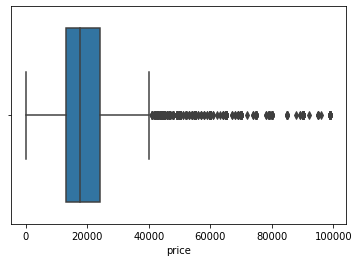

In [13]:
sns.boxplot(data=data,x='price');

C:\Users\t\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

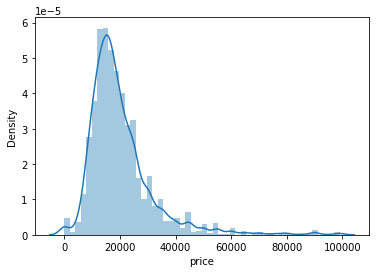

In [14]:
sns.distplot(data["price"])

In [15]:
a = data[data['price'] < 1000].index
data.drop(a,inplace=True)
data = data[data['price'] <= 35000]

Text(0, 0.5, 'Price')

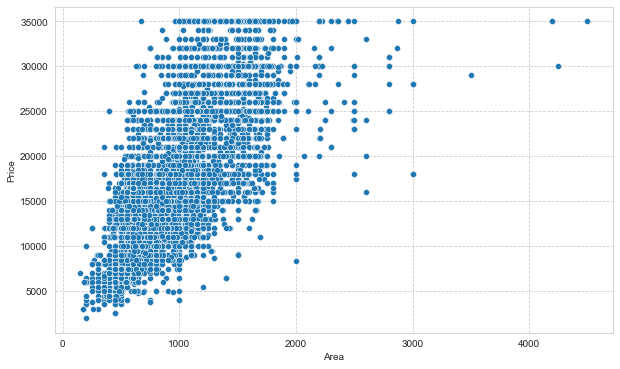

In [16]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

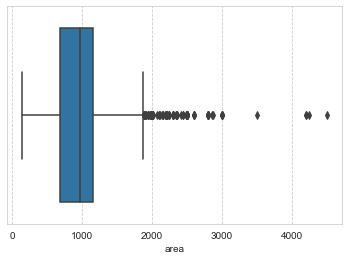

In [17]:
sns.boxplot(data=data,x='area');

In [18]:
data = data[data['area'] <= 1800]

Text(0, 0.5, 'Price')

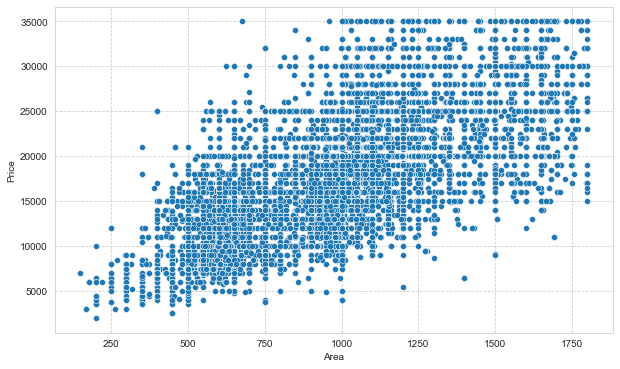

In [19]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

 Drop outliers of price value and area

In [20]:
data = data.drop(data[(data.area<250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price==35000)].index)
data = data.drop(data[(data.area<500) & (data.price==25000)].index)
data = data.drop(data[(data.area<=750) & (data.price==35000)].index)
data = data.drop(data[(data.area==500) & (data.price>25000) ].index)
data = data.drop(data[(data.area>1750) & (data.price>=10000) & (data.price<15000)].index)
data = data.drop(data[(data.area>750) & (data.area<1000) & (data.price<5000)].index)
data = data.drop(data[(data.area==250) & (data.price>15000)].index)
data = data.drop(data[(data.area<500) & (data.price>20000)].index)
data = data.drop(data[(data.area>1750) & (data.price<10000)].index)
data = data.drop(data[(data.area<800) & (data.price>35000)].index)

Text(0, 0.5, 'Price')

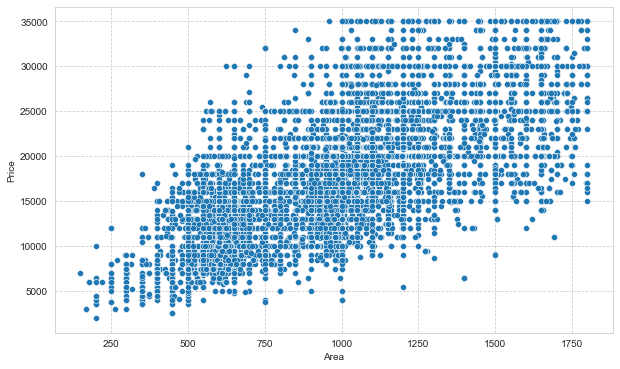

In [21]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (10,6))
sns.scatterplot(x = "area", y = "price", data = data)
plt.xlabel("Area")
plt.ylabel("Price")

# Cleaned Data

In [22]:
data.to_csv("Cleaned_data.csv")

In [23]:
X = data.drop(columns=['price'])
y = data['price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.19,random_state=2)

# Applying Linear Regression

In [25]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5844973990802484
MAE 3277.4307184512422


In [26]:
y_pred = pipe.predict(X_test)
yt_pred = pipe.predict(X_train)

print('Predicted Value for model is : \n' ,list(y_pred[:5]))
print('real Value for model is : \n' , y_test[:5])

Predicted Value for model is : 
 [12913.177495157608, 18232.85108236837, 25743.510788631225, 20651.796899378125, 11001.661446220674]
real Value for model is : 
 5345     10500
1618     18200
6808     23000
10840    23000
11590    12000
Name: price, dtype: int32


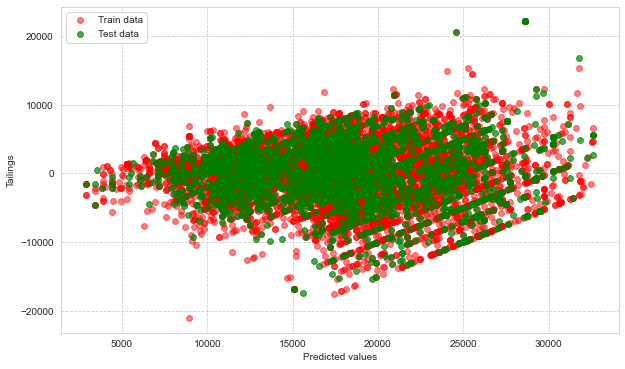

In [27]:
plt.figure(figsize=(10,6))

plt.scatter(yt_pred,yt_pred - y_train,c = 'red', marker = 'o', s = 35, alpha = 0.5,label = 'Train data')
plt.scatter(y_pred,y_pred - y_test, c = 'green', marker = 'o', s = 35, alpha = 0.7,label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.show()

# Applying RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor


In [29]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.645687846221294
MAE 2746.8767105851252


In [30]:
y_pred1 = pipe1.predict(X_test)
yt_pred1 = pipe1.predict(X_train)

print('Predicted Value for model is : \n', list(y_pred1[:5]))
print('real Value for model is : \n', y_test[:5])


Predicted Value for model is : 
 [13368.333333333336, 18126.028821988057, 24555.724963924964, 23121.488095238095, 13203.25396825397]
real Value for model is : 
 5345     10500
1618     18200
6808     23000
10840    23000
11590    12000
Name: price, dtype: int32


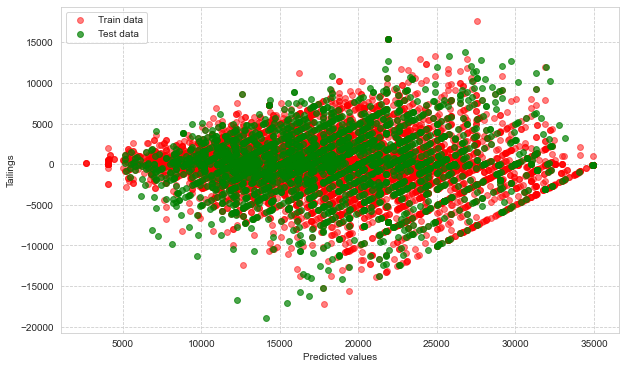

In [31]:
plt.figure(figsize=(10, 6))

plt.scatter(yt_pred1, yt_pred1 - y_train, c='red',
            marker='o', s=35, alpha=0.5, label='Train data')
plt.scatter(y_pred1, y_pred1 - y_test, c='green',
            marker='o', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.show()


# Applying KNeighborsRegressor

In [32]:

from sklearn.ensemble import RandomForestRegressor


In [33]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,4,6])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6455650246391291
MAE 2741.6070848863424


In [34]:
y_pred2 = pipe2.predict(X_test)
yt_pred2 = pipe2.predict(X_train)

print('Predicted Value for model is : \n', list(y_pred2[:5]))
print('real Value for model is : \n', y_test[:5])

Predicted Value for model is : 
 [13731.333333333332, 18117.30324837843, 24587.670598845598, 22976.444444444445, 13144.623015873016]
real Value for model is : 
 5345     10500
1618     18200
6808     23000
10840    23000
11590    12000
Name: price, dtype: int32


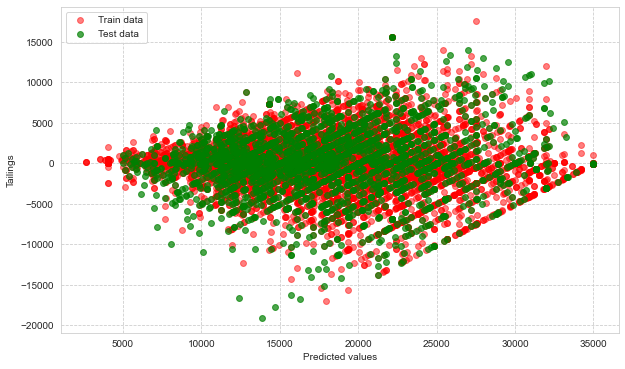

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(yt_pred2, yt_pred2 - y_train, c='red',
            marker='o', s=35, alpha=0.5, label='Train data')
plt.scatter(y_pred2, y_pred2 - y_test, c='green',
            marker='o', s=35, alpha=0.7, label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc='upper left')
plt.show()


In [36]:

from sklearn.linear_model import LogisticRegression


# Dumping the model to a pickle File

In [37]:
import pickle
#we chose KNN based on its score
pickle.dump(pipe2,open('pune_rent.pkl','wb'))

**Conclusion**

In [40]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2)) 
print('MSE:', metrics.mean_squared_error(y_test,y_pred2)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred2))) 
print('R2 score:',r2_score(y_test,y_pred2))

MAE: 2741.6070848863424
MSE: 15422452.601701677
RMSE: 3927.1430584716004
R2 score: 0.6455650246391291
